In [1]:
import plotly.express as px
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import statsmodels.api as sm
import chart_studio.tools as tls
# Set random seed to ensure reproducible runs
RSEED = 645

In [2]:
import plotly.offline as py
import plotly.graph_objs as go
import plotly.io as pio; 
import chart_studio.plotly as py
pio.renderers.default='notebook'
import plotly.offline
from plotly.offline import *


In [3]:
df = pd.read_csv(r'df_cmb.csv') 

In [4]:
USA= df.loc[df['country'] == 'USA']
CN= df.loc[df['country'] == 'CN']
IN= df.loc[df['country'] == 'IN']
NL= df.loc[df['country'] == 'NL'] 

## Self Assessed Resilience 
Self assessed resilience is represented by 's_res'
It is a composit of 6 variabels (shown below) on a scale from 5-35.

Each variable represents a unique capital or capacity - different components theorized to comprise resilience


These are all the s_res vars


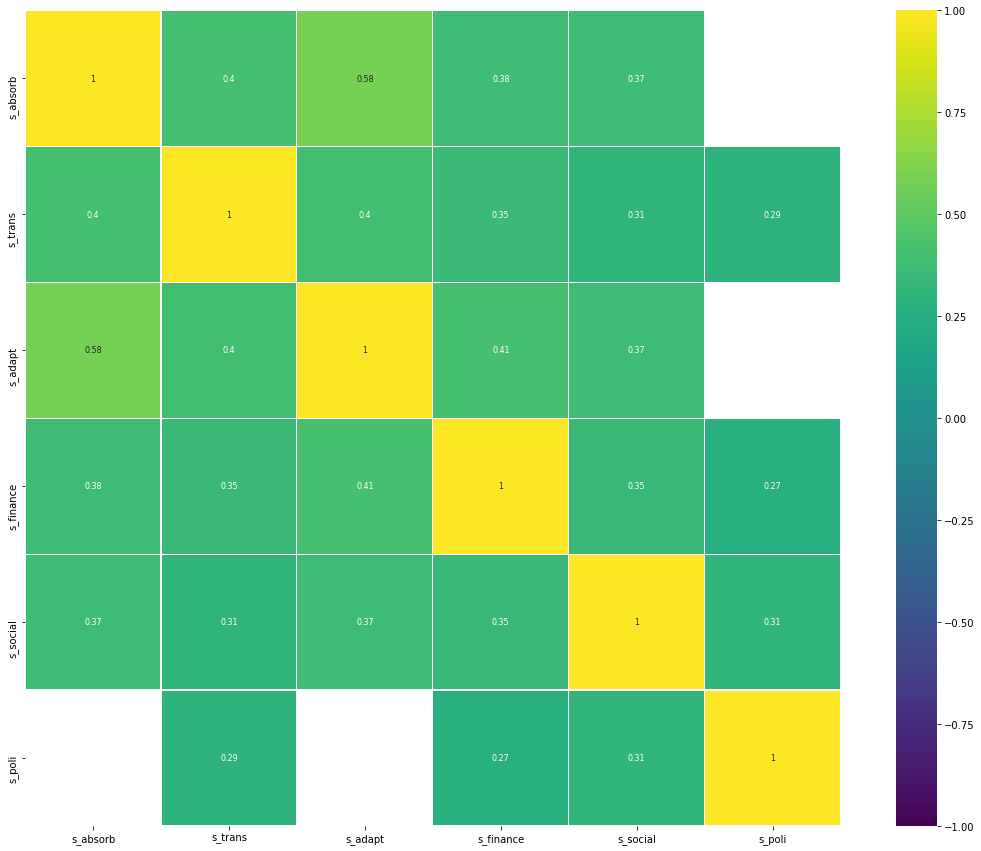

In [5]:
df_sr = df[['s_absorb', 's_trans', 's_adapt', 's_finance', 's_social', 's_poli']]
corr = df_sr.corr() #change the number to scroll through
print("These are all the s_res vars")
plt.figure(figsize=(20, 15))
sns.heatmap(corr[(corr >= 0.25) | (corr <= -0.25)], 
            cmap='viridis', vmax=1.0, vmin=-1.0, linewidths=0.1,
            annot=True, annot_kws={"size": 8}, square=True);

The Netherlands seems to lack extreme values and China and Indonesia both seem to have a number of higher values... Lets take a closer look.

In [6]:
from plotly.subplots import make_subplots


fig = make_subplots(rows=2, cols=2, 
                    subplot_titles =("USA", "China", "Indonesia", "Netherlands"))

trace0 = go.Histogram(x=USA.s_res, nbinsx=30)
trace1 = go.Histogram(x=CN.s_res, nbinsx = 30)
trace2 = go.Histogram(x=IN.s_res, nbinsx=30)
trace3 = go.Histogram(x=NL.s_res, nbinsx= 30)

fig.append_trace(trace0, 1, 1)
fig.append_trace(trace1, 1, 2)
fig.append_trace(trace2, 2, 1)
fig.append_trace(trace3, 2, 2)

#fig.show()
#py.plot(fig, filename='hist.html')
#pio.write_html(fig, file= 'hist.html', auto_open=True)
#plotly.offline.plot(fig, filename='hist.html')

import chart_studio.tools as tls
tls.get_embed('hist.html') #change to your url


PlotlyError: Because you didn't supply a 'file_id' in the call, we're assuming you're trying to snag a figure from a url. You supplied the url, 'hist.html', we expected it to start with 'https://plotly.com'.
Run help on this function for more information.

All countries except the Netherlands are slightly left-skewed. Interesting. Maybe come back to that with some cultural interpertation/ analysis.

Next, lets look at what s_res is correllated with.

In [7]:
#most coorellated list    
df_corr = df.corr(method ='spearman')['s_res']#[:-2] # - because the s int is the 2nd to last
          #Input a variable of interest ^^
most_cor_list = df_corr[abs(df_corr) > 0.2].sort_values(ascending=False)
print("There are {} 'moderately' correlated values with the the composit self resilience var:\n{}".format(len(most_cor_list), 
                                                                         most_cor_list))
print("")
print ('please note that all vars on the list that start with as s_ are apart of the variable and the negative \
correllation with the variables that make it up is due to me flipping the sign of the composite (so higher is more resilient)')


There are 28 'moderately' correlated values with the the composit self resilience var:
s_res         1.000000
NS_SE0        0.329144
econ_comf     0.314139
NS_SE5        0.258904
const_qual    0.255178
S_SE0         0.250718
NS_RE0        0.245053
NS_SE4        0.238564
NS_SE7        0.235418
S_SE4         0.229880
S_SE7         0.229534
savings_n     0.228057
savings       0.228057
NS_SE11       0.226768
S_SE5         0.224779
S_SE3         0.222340
NS_SE8        0.218121
S_SE6         0.217764
NS_SE2        0.212250
NS_SE10       0.209109
NS_RE11       0.204970
NS_SE6        0.203543
s_poli       -0.536979
s_trans      -0.661042
s_finance    -0.669539
s_social     -0.670997
s_absorb     -0.703931
s_adapt      -0.711926
Name: s_res, dtype: float64

please note that all vars on the list that start with as s_ are apart of the variable and the negative correllation with the variables that make it up is due to me flipping the sign of the composite (so higher is more resilient)


The above process is nice because it automatically sorts through all of our data and using Spearmans r, finds correllated values for us. We can see that s_res correllates with a lot of coping apprasial variables and a couple economic ones as well. However, often Spearmans is a less that optimal test to run - (obviously) especailly for binary variables. Thus we need to look into other methods

When added to the PMT models, i.e. such as below, self resilience is not significant adn does not add anyhing 

In [8]:
from statsmodels.discrete.discrete_model import Logit 
EUMod = Logit.from_formula("NS_int_bi ~ Dam2 + fl_per + worry + NS_SE0 + \
NS_RE0 + NS_cost0 + s_res", df).fit()
#print('Parameters: ', EUMod.params)
print(EUMod.summary())

Optimization terminated successfully.
         Current function value: 0.475224
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:              NS_int_bi   No. Observations:                 5258
Model:                          Logit   Df Residuals:                     5250
Method:                           MLE   Df Model:                            7
Date:                Wed, 27 May 2020   Pseudo R-squ.:                 0.07799
Time:                        11:36:59   Log-Likelihood:                -2498.7
converged:                       True   LL-Null:                       -2710.1
Covariance Type:            nonrobust   LLR p-value:                 3.221e-87
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -2.1910      0.282     -7.770      0.000      -2.744      -1.638
Dam2           0.0801      0.

Ok so in the normal PMT models its not very useful. We have already looked at how it is distributed across countries... how is it distributed across socio-economic characteristics

In [ ]:
fig = make_subplots(rows=3, cols=2,
                   subplot_titles =("Male", "Inc. Quint.", "Econ Comfert", "age",
                                   "Education", 'No old ppl or kids in house'))

fig.add_trace(
    go.Box(x=df['gender'], y = df['s_res']),
    row=1, col=1)

fig.add_trace(
    go.Box(x=df['inc'], y = df['s_res']),
    row=1, col=2)

fig.add_trace(
    go.Box(x=df['econ_comf'], y = df['s_res']),
    row=2, col=1)

fig.add_trace(
    go.Box(x=df['age'], y = df['s_res']),
    row=2, col=2)

fig.add_trace(
    go.Box(x=df['edu'], y = df['s_res']),
    row=3, col=1)

fig.add_trace(
    go.Box(x=df['no_vuln'], y = df['s_res']),
    row=3, col=2)

fig.update_layout(height=900, width=900, 
                  title_text="Uncertanty and intention to take action "
                 )
#fig.show()
py.iplot(fig, filename='box')

Great. There are a number of interesting patters observed here. Income, Self assessed 'economic comfert', and education seem to show some linear relationship with 's_res'. 
With age, we could be witnessing some non-linear dynamics with a peak in middle age. There seems to be a relationship between socio-economic vars and s_res. Lets look at a few more relationships

In [ ]:
tst1 = px.box(df, x= 'savings_n', y = 's_res', color = 'country')
py.iplot(tst1, filename='box2')

## Cumulative Probability Error

In [ ]:
df['fl_exp_o'] = df['fl_exp'].astype(object)

temp = df[['fl_exp_o', 'error_30']].dropna()
error = px.histogram(temp, x="error_30", color = 'fl_exp_o', nbins = 45)
py.iplot(error, filename='hist2')

In [ ]:
EXP0= df.loc[df['fl_exp'] == 0]
EXP= df.loc[df['fl_exp'] == 1] 

In [ ]:
tst1 = px.box(EXP0, x= 'CC_affect', y = 'error_30')
#tst1.update_traces(orientation='h') # horizontal box plots
py.iplot(tst1, filename='box3')

In [ ]:
tst2 = px.box(EXP, x= 'CC_affect', y = 'error_30')
#tst1.update_traces(orientation='h') # horizontal box plots
py.iplot(tst2, filename='box4')